<a href="https://www.kaggle.com/code/ddking77/previsao-de-avc?scriptVersionId=135968106" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Stroke Prediction


Neste trabalho, exploraremos o Stroke Prediction Dataset para analisar fatores de risco e características associados a acidentes vasculares cerebrais (AVCs). Utilizaremos técnicas como regressão linear, clustering, árvores de decisão e redes neurais artificiais para extrair informações relevantes dos dados. O objetivo é compreender os fatores que contribuem para o surgimento de um AVC e fornecer insights valiosos para prevenção e tratamento. Faremos análise exploratória, regressão linear para previsão de AVC, clustering para identificar grupos de risco, árvores de decisão para visualizar as regras de classificação e redes neurais para análise detalhada. Essas descobertas podem auxiliar profissionais médicos no desenvolvimento de estratégias mais eficazes contra o AVC.

# Imports

In [1]:
import pandas as pd
import warnings
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import FunctionTransformer , StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import plotly.express as px
from sklearn import metrics

warnings.filterwarnings('ignore')

raw_data = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

# Analise e Tratamento dos Dados

Iremos primerio intrepetar e entender o nosso dataset, e conforme seja desejado, iremos fazer algumas alterações

In [2]:
df=raw_data.copy()

Número de colunas e linhas do dataset:

In [3]:
df.shape

(5110, 12)

Nome das colunas do nosso dataset:

In [4]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

**Definição das nossas colunas**:
*  gender: gênero da pessoa (male-masculino, female-feminino, other-outro)
*  age: idade da pessoa
*  hypertension: pressão arterial elevada (1-tem, 0-não tem)
*  heart disease: doença cardíaca (1-tem, 0-não tem)
*  ever_married: se já casou
*  work_type: tipo de trabalho (Govt_job-Trabalho governo, children-criança, Never_worked-Nunca trabalhou, Private-Privado, Self_Employed-Trabalhadores por conta própria)
*  Residence_type: Tipo de Residência (Rural, Urbano)
*  avg_glucose_level: niveis médios de glucose
*  bmi: índice de massa de corporal
*  smoking_status: Estado de fumante (Unknown-Desconhecido, formerly smoked- Parou de fumar, never smoked-Nunca fumou, smokes-fuma)
*  stroke: Acidente vascular cerebral (1- Ja teve, 0-Não teve)



Como o id é irrelevante para calcular qualquer valor deste dataset irei eliminar esta coluna.

In [5]:
df.drop(columns=['id'],inplace=True) 

Verificas as primeira 5 linhas do nosso dataset

In [6]:
df.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21   NaN     never smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1

Verificar a existencia da registos com falta de dados, e tipo das colunas:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


Breve análise nas colunas de tipo float ou int.
Aqui iremos ver a contagem de valores de cada coluna (count), média de valores (mean), o maior e menor valor (min e max), o desvio padrão (std), e tambem medianas e quartis.

In [8]:
round (df.describe(exclude = 'object'), 2)

age  hypertension  heart_disease  avg_glucose_level      bmi  \
count  5110.00        5110.0        5110.00            5110.00  4909.00   
mean     43.23           0.1           0.05             106.15    28.89   
std      22.61           0.3           0.23              45.28     7.85   
min       0.08           0.0           0.00              55.12    10.30   
25%      25.00           0.0           0.00              77.24    23.50   
50%      45.00           0.0           0.00              91.88    28.10   
75%      61.00           0.0           0.00             114.09    33.10   
max      82.00           1.0           1.00             271.74    97.60   

        stroke  
count  5110.00  
mean      0.05  
std       0.22  
min       0.00  
25%       0.00  
50%       0.00  
75%       0.00  
max       1.00

Agora faremos a mesma coisa, mas com objetos. Alêm de tambem termos o numero total de valores (count), tambem temos o numero de categorias e cada coluna (unique), a categoria na moda (top), e numero de vezes dessa categoria (freq).

In [9]:
round (df.describe(exclude = ['float', 'int64']),2)


gender ever_married work_type Residence_type smoking_status
count     5110         5110      5110           5110           5110
unique       3            2         5              2              4
top     Female          Yes   Private          Urban   never smoked
freq      2994         3353      2925           2596           1892

Como verifiquei que existem dados em falta na coluna do BMI, irei introduzir dados nessa coluna com a média da BMI existente.

In [10]:
df=df.fillna(np.mean(df['bmi']))

In [11]:
round (df.describe(exclude = 'object'), 2)

age  hypertension  heart_disease  avg_glucose_level      bmi  \
count  5110.00        5110.0        5110.00            5110.00  5110.00   
mean     43.23           0.1           0.05             106.15    28.89   
std      22.61           0.3           0.23              45.28     7.70   
min       0.08           0.0           0.00              55.12    10.30   
25%      25.00           0.0           0.00              77.24    23.80   
50%      45.00           0.0           0.00              91.88    28.40   
75%      61.00           0.0           0.00             114.09    32.80   
max      82.00           1.0           1.00             271.74    97.60   

        stroke  
count  5110.00  
mean      0.05  
std       0.22  
min       0.00  
25%       0.00  
50%       0.00  
75%       0.00  
max       1.00

Separei os dados numericos com os categoricos.

In [12]:
df_numerical=df[['age','avg_glucose_level','bmi']]
df_categorical=df[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                       'smoking_status', 'stroke']]

Agora analisarei os dados numericos, com AVC e sem AVC.

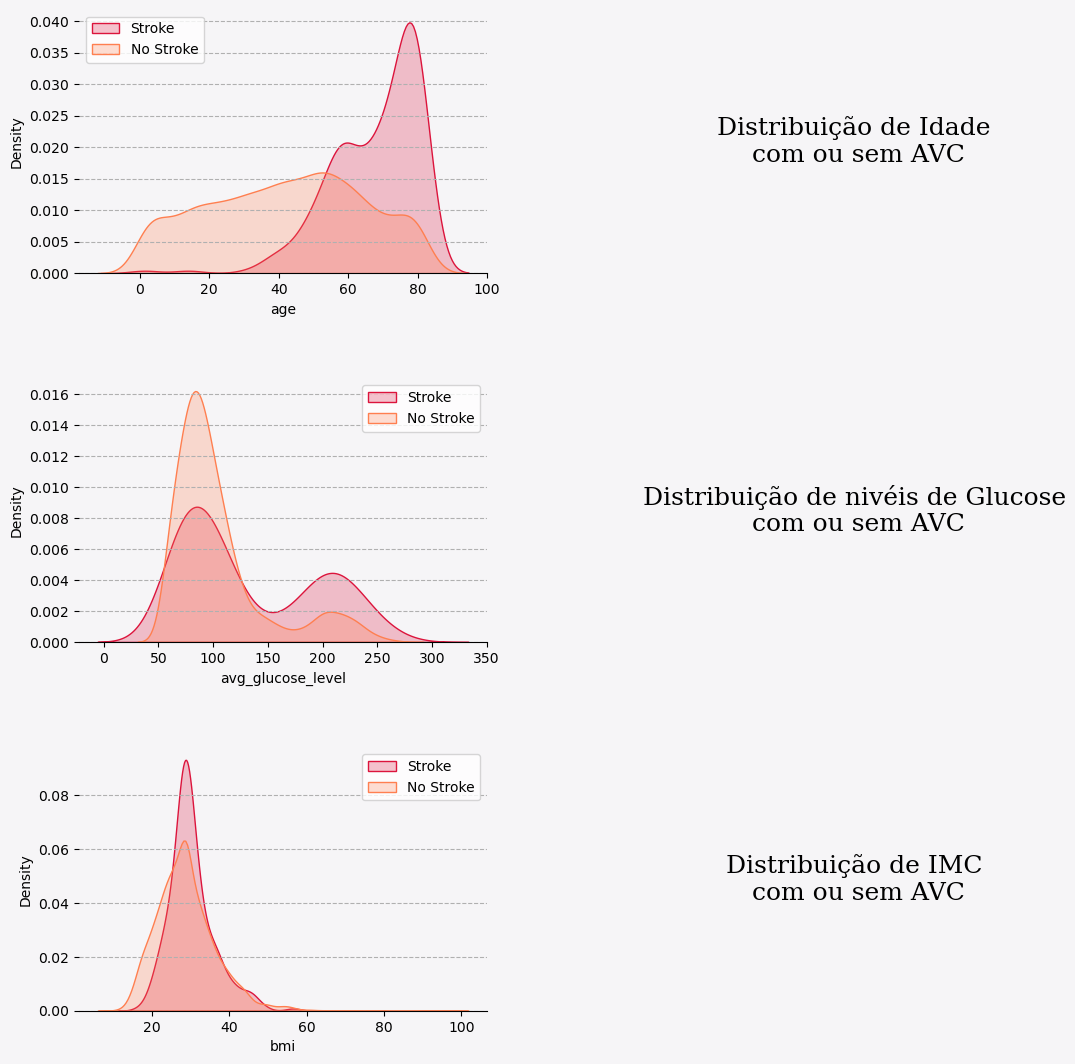

In [13]:
fig = plt.figure(figsize=(20,13))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.4, hspace=0.4)
# adding figures
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
axes=[ax0,ax1,ax2,ax3,ax4,ax5]
background_color = '#f6f5f7'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color) 
#https://www.geeksforgeeks.org/kde-plot-visualization-with-pandas-and-seaborn/
sns.kdeplot(ax=ax0,x=df.loc[df['stroke']==1]['age'],color='crimson',label='Stroke',shade=True)
sns.kdeplot(ax=ax0,x=df.loc[df['stroke']==0]['age'],color='coral',label='No Stroke',shade=True)
ax0.legend(loc = 'upper left')
ax0.grid(linestyle='--', axis='y')

ax1.text(0.5,0.5,'Distribuição de Idade\n com ou sem AVC',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18,fontfamily='serif')

sns.kdeplot(ax=ax2,x=df.loc[df['stroke']==1]['avg_glucose_level'],color='crimson',label='Stroke',shade=True)
sns.kdeplot(ax=ax2,x=df.loc[df['stroke']==0]['avg_glucose_level'],color='coral',label='No Stroke',shade=True)
ax2.legend(loc = 'upper right')
ax2.grid(linestyle='--', axis='y')

ax3.text(0.5,0.5,'Distribuição de nivéis de Glucose\n com ou sem AVC',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18,fontfamily='serif')


sns.kdeplot(ax=ax4,x=df.loc[df['stroke']==1]['bmi'],color='crimson',label='Stroke',shade=True)
sns.kdeplot(ax=ax4,x=df.loc[df['stroke']==0]['bmi'],color='coral',label='No Stroke',shade=True)
ax4.legend(loc = 'upper right')
ax4.grid(linestyle='--', axis='y')

ax5.text(0.5,0.5,'Distribuição de IMC\n com ou sem AVC',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18,fontfamily='serif')
# removing labels

axes1=[ax1,ax3,ax5]
for i in axes1:
    i.spines["bottom"].set_visible(False)
    i.spines["left"].set_visible(False)
    i.set_xlabel("")
    i.set_ylabel("")
    i.set_xticklabels([])
    i.set_yticklabels([])
    i.tick_params(left=False, bottom=False)
# removing spines of figures
for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)

Analisando estes distribuiçãos de dados podemos ver que pessoas com idades acima dos 40 começam a ser mais provaveis de ter um AVC.

Agora irei fazer gráficos de dispersão entre as variaveis numéricas, para tentar verificar padrões ou grupos.

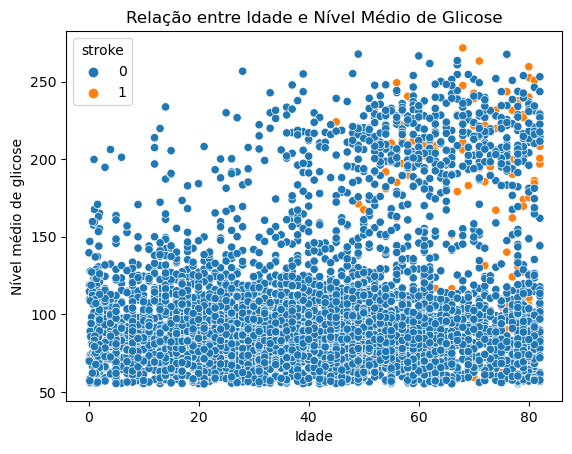

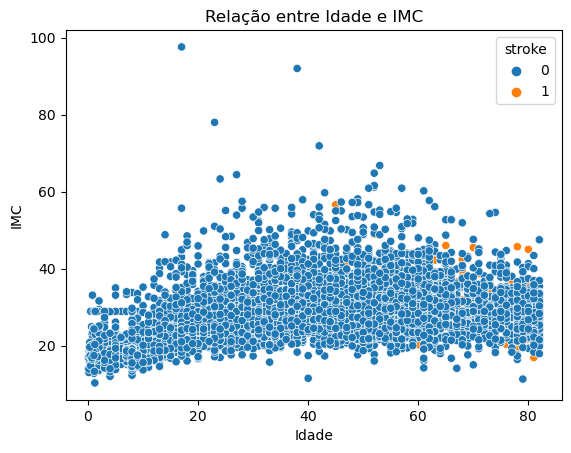

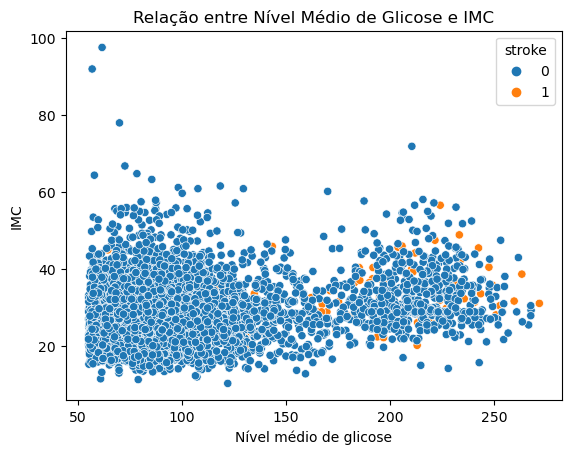

In [14]:
sns.scatterplot(data=df, x='age', y='avg_glucose_level', hue='stroke')
plt.xlabel('Idade')
plt.ylabel('Nível médio de glicose')
plt.title('Relação entre Idade e Nível Médio de Glicose')
plt.show()

# Gráfico de dispersão idade vs. bmi
sns.scatterplot(data=df, x='age', y='bmi', hue='stroke')
plt.xlabel('Idade')
plt.ylabel('IMC')
plt.title('Relação entre Idade e IMC')
plt.show()

# Gráfico de dispersão avg_glucose_level vs. bmi
sns.scatterplot(data=df, x='avg_glucose_level', y='bmi', hue='stroke')
plt.xlabel('Nível médio de glicose')
plt.ylabel('IMC')
plt.title('Relação entre Nível Médio de Glicose e IMC')
plt.show()

Com estes gráficos vejo que idades maiores e com niveis de glicose acima de 100 são mais prováveis de ter um AVC.
Pessoas com BMI abaixo de 50 e acima de 150 de niveis de glicose, também são prováveis de ter um AVC.

Agora os quartis e a distribuição dos valores numéricos, com e sem AVC.

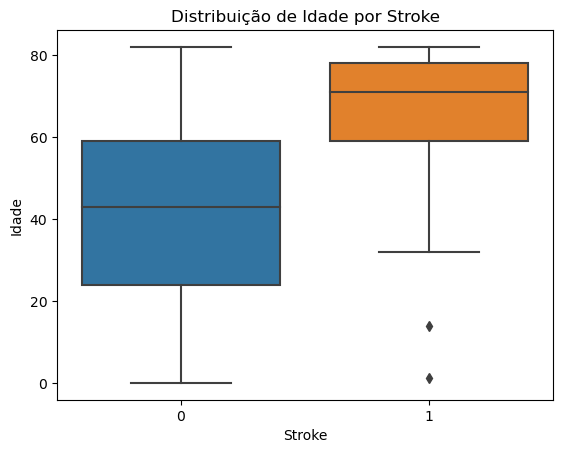

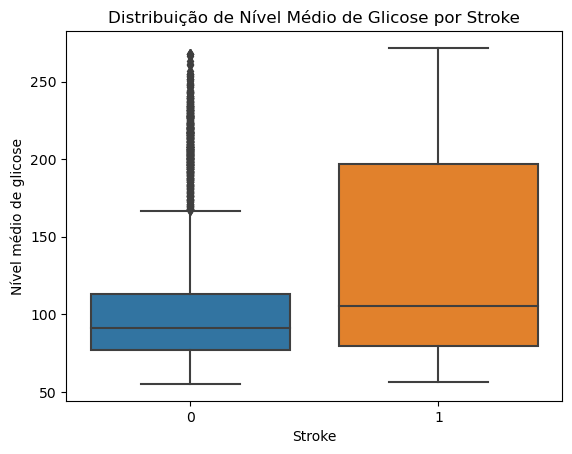

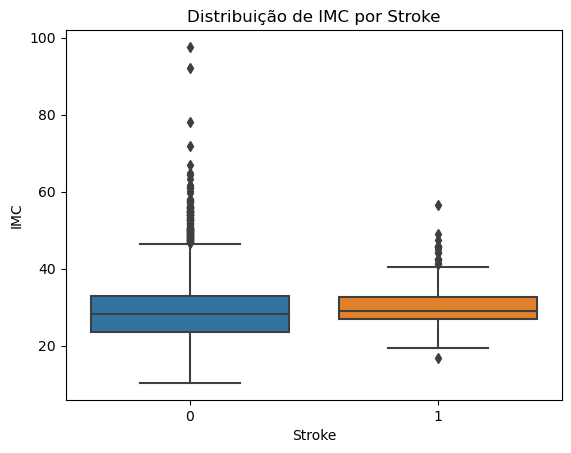

In [15]:
sns.boxplot(data=df, x='stroke', y='age')
plt.xlabel('Stroke')
plt.ylabel('Idade')
plt.title('Distribuição de Idade por Stroke')
plt.show()

# Boxplot avg_glucose_level por stroke
sns.boxplot(data=df, x='stroke', y='avg_glucose_level')
plt.xlabel('Stroke')
plt.ylabel('Nível médio de glicose')
plt.title('Distribuição de Nível Médio de Glicose por Stroke')
plt.show()

# Boxplot bmi por stroke
sns.boxplot(data=df, x='stroke', y='bmi')
plt.xlabel('Stroke')
plt.ylabel('IMC')
plt.title('Distribuição de IMC por Stroke')
plt.show()

Verificar qual a quantidade de cada categoria nos valores categóricos.

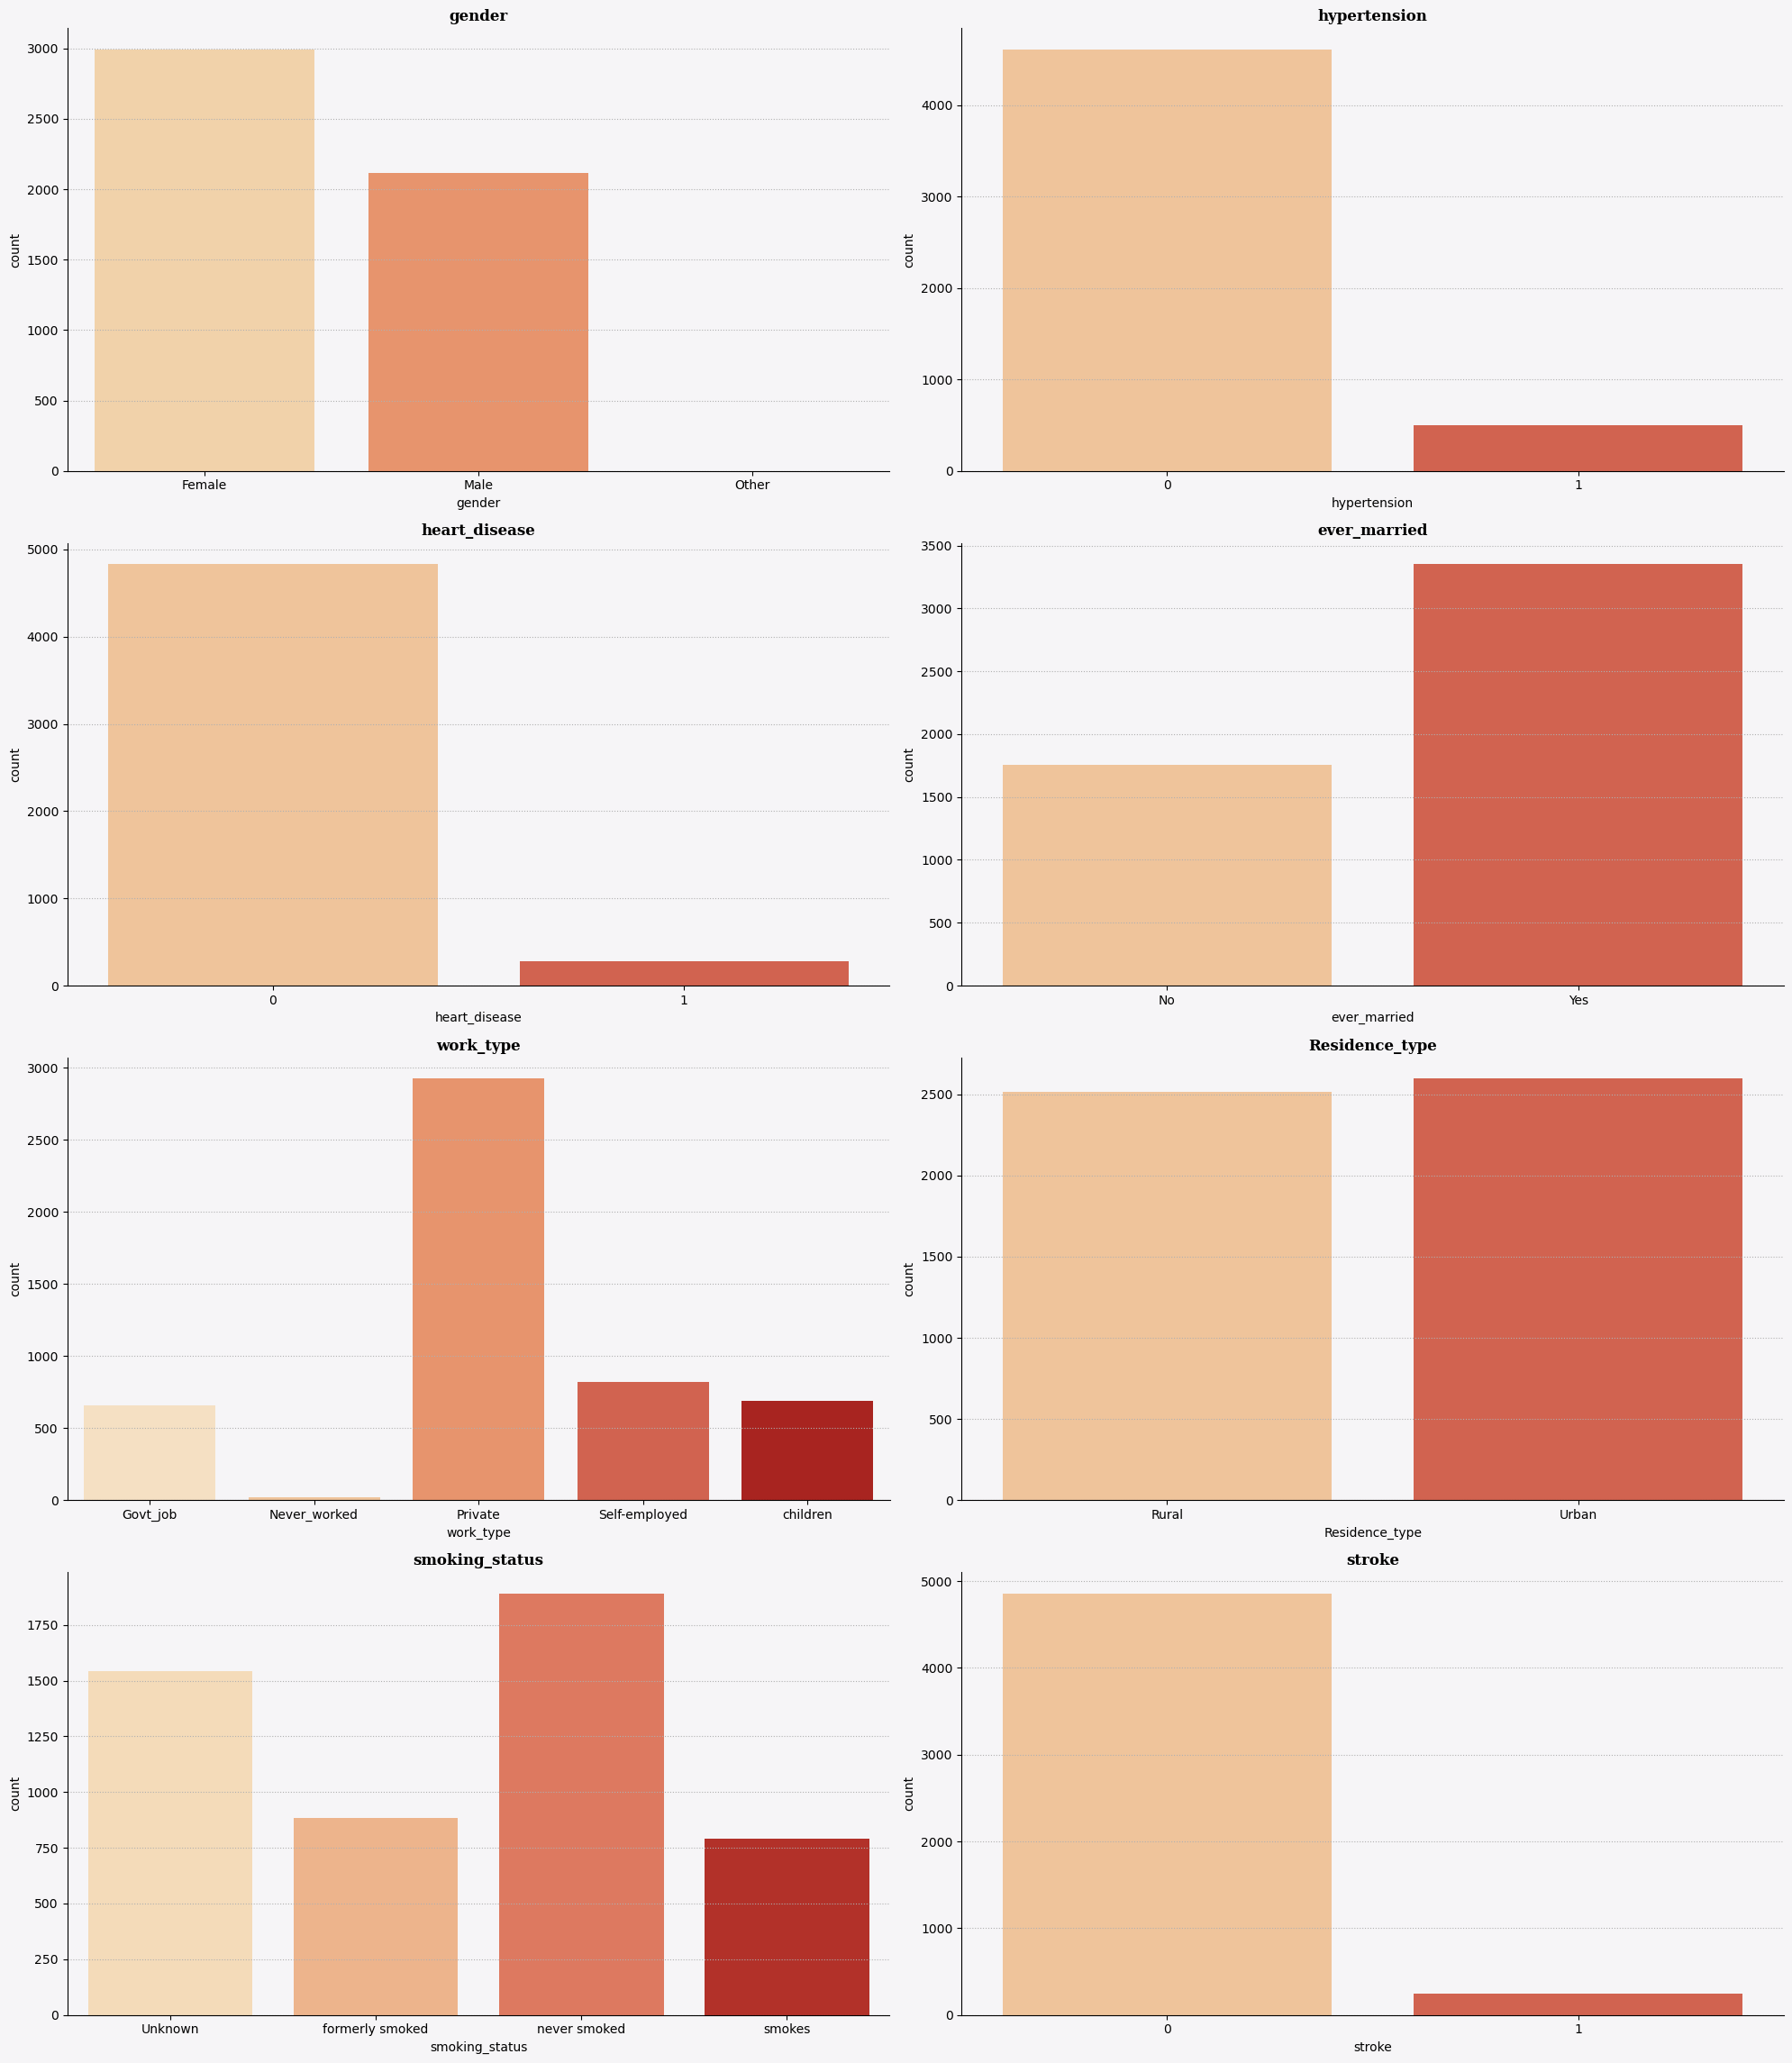

In [16]:
fig = plt.figure(figsize=(20, 23))
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color)

for indx, val in enumerate(df_categorical.columns):
    ax = plt.subplot(4, 2, indx + 1)
    ax.set_facecolor(background_color)
    ax.set_title(val, fontweight='bold', fontfamily='serif')
    for i in ['top', 'right']:
        ax.spines[i].set_visible(False)
    ax.grid(linestyle=':', axis='y')
    
    # Certifique-se de que a coluna seja do tipo categórico
    df_categorical[val] = df_categorical[val].astype('category')
    
    # Use o countplot para criar o gráfico de contagem
    sns.countplot(data=df_categorical, x=val, palette='OrRd')

plt.tight_layout()
plt.show()

E tambèm a taxa de AVC para cada categoria, de cada coluna.

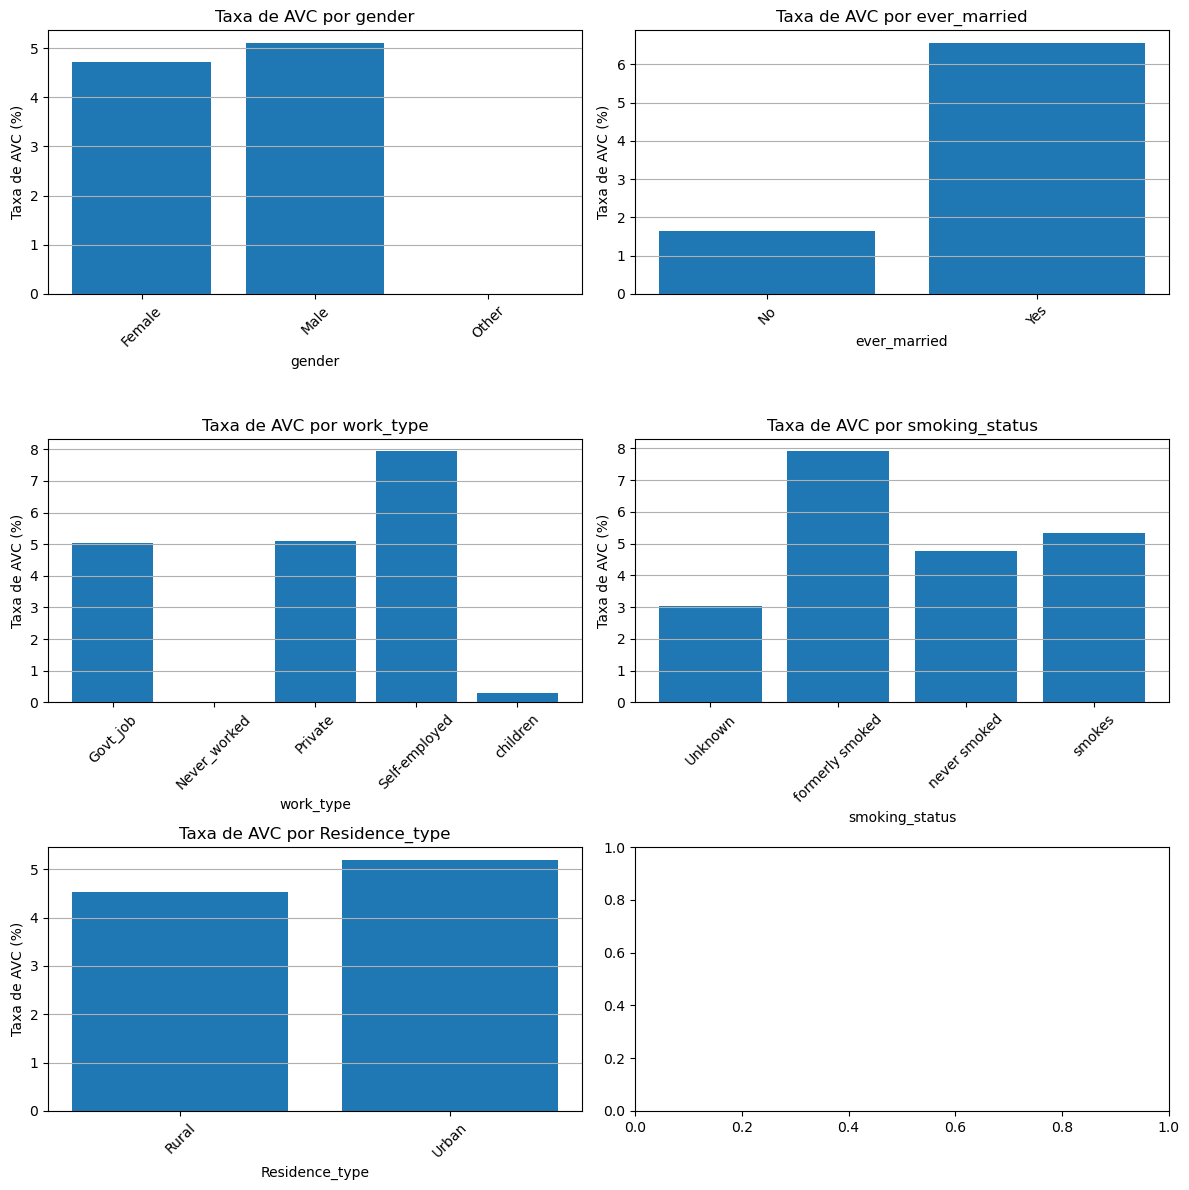

In [17]:


categorical_vars = ['gender', 'ever_married', 'work_type', 'smoking_status', 'Residence_type']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.subplots_adjust(hspace=0.4)

for var, ax in zip(categorical_vars, axes.flat):
    grouped = df.groupby(var)
    stroke_count = grouped['stroke'].sum()
    total_count = grouped.size()
    avc_rates = (stroke_count / total_count) * 100

    ax.bar(avc_rates.index, avc_rates)
    ax.set_xlabel(var)
    ax.set_ylabel('Taxa de AVC (%)')
    ax.set_title('Taxa de AVC por {}'.format(var))
    ax.set_xticklabels(avc_rates.index, rotation=45)
    ax.yaxis.grid(True)

plt.tight_layout()
plt.show()


Nestes grafos vejo que pessoas que já casaram, trabalhadores por conta própia, e pessoas pararam de fumar, tem uma certa diferença na taxa de AVC, comparado com as categorias da mesma coluna.

Irei passar os valores categóricos, para numeros.
E depois irei criar um heat map.

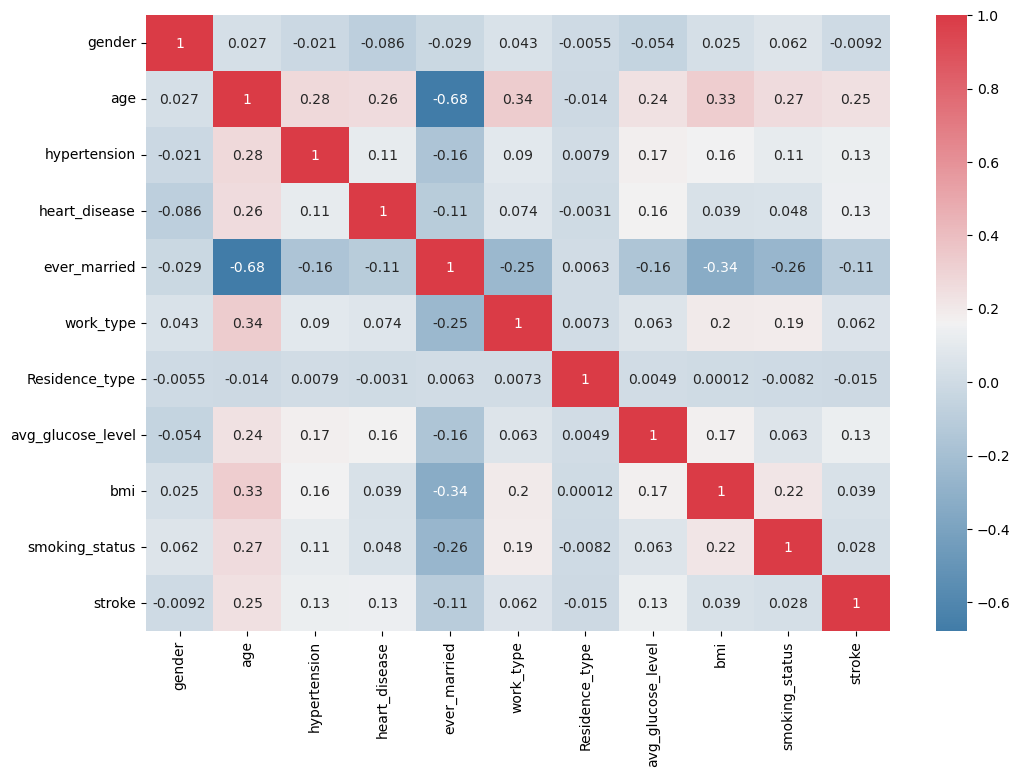

In [18]:
mapping_gender = {
    'Male': 0,
    'Female': 1,
    'Other': 2
}
mapping_ever_married = {
    'Yes': 0,
    'No': 1,
}
mapping_work_type = {
    'Govt_job': 0,
    'children': 1,
    'Never_worked':2,
    'Private':3,
    'Self-employed':4
}
mapping_smoking_status={
    'Unknown':0,
    'formerly smoked':1,
    'never smoked':2,
    'smokes':3
}
mapping_Residence_type={
    'Urban':0,
    'Rural':1
}

# Aplicar o mapeamento à coluna 'gender'
df['gender'] = df['gender'].map(mapping_gender)
df['ever_married'] = df['ever_married'].map(mapping_ever_married)
df['work_type'] = df['work_type'].map(mapping_work_type)
df['smoking_status'] = df['smoking_status'].map(mapping_smoking_status)
df['Residence_type'] = df['Residence_type'].map(mapping_Residence_type)


plt.figure(figsize=(12, 8))

# Definir mapa de cores personalizado
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Gerar heatmap com cores personalizadas
sns.heatmap(df.corr(), annot=True, cmap=cmap)

# Exibir o gráfico
plt.show()

# Regressão Linear

Aqui crie dois gráficos de regressão linear, um para age e bmi, e outro para bmi e avg_glucose_level.

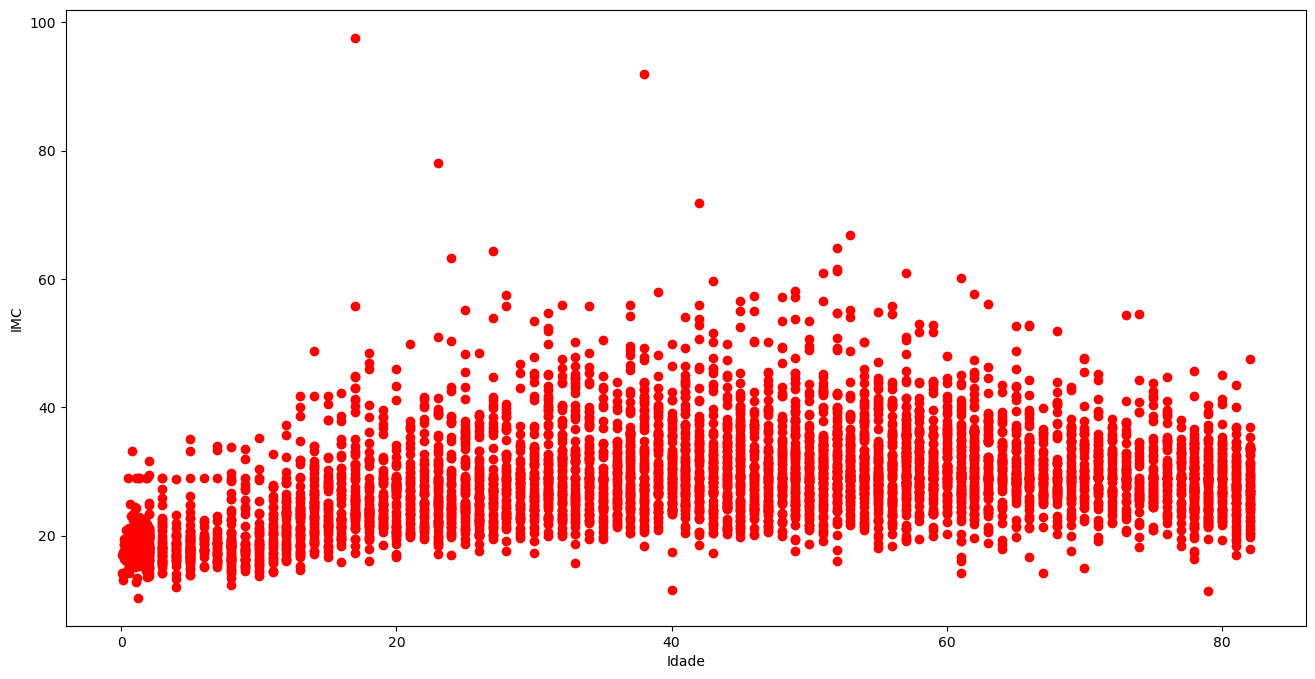

Coeficientes: [0.11096052]
Intercept: 24.096789424820315


In [19]:
plt.figure(figsize=(16, 8))
plt.scatter(df['age'], df['bmi'], c='red')
plt.xlabel('Idade')
plt.ylabel('IMC')
plt.show()

X = df[['age']]
y = df['bmi']

# Codificar a variável categórica "smoking_status"


reg = LinearRegression()
reg.fit(X, y)

# Coeficientes do modelo
print('Coeficientes:', reg.coef_)
print('Intercept:', reg.intercept_)

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     607.2
Date:                Fri, 07 Jul 2023   Prob (F-statistic):          9.00e-127
Time:                        01:06:25   Log-Likelihood:                -17393.
No. Observations:                5110   AIC:                         3.479e+04
Df Residuals:                    5108   BIC:                         3.480e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0968      0.220    109.693      0.0

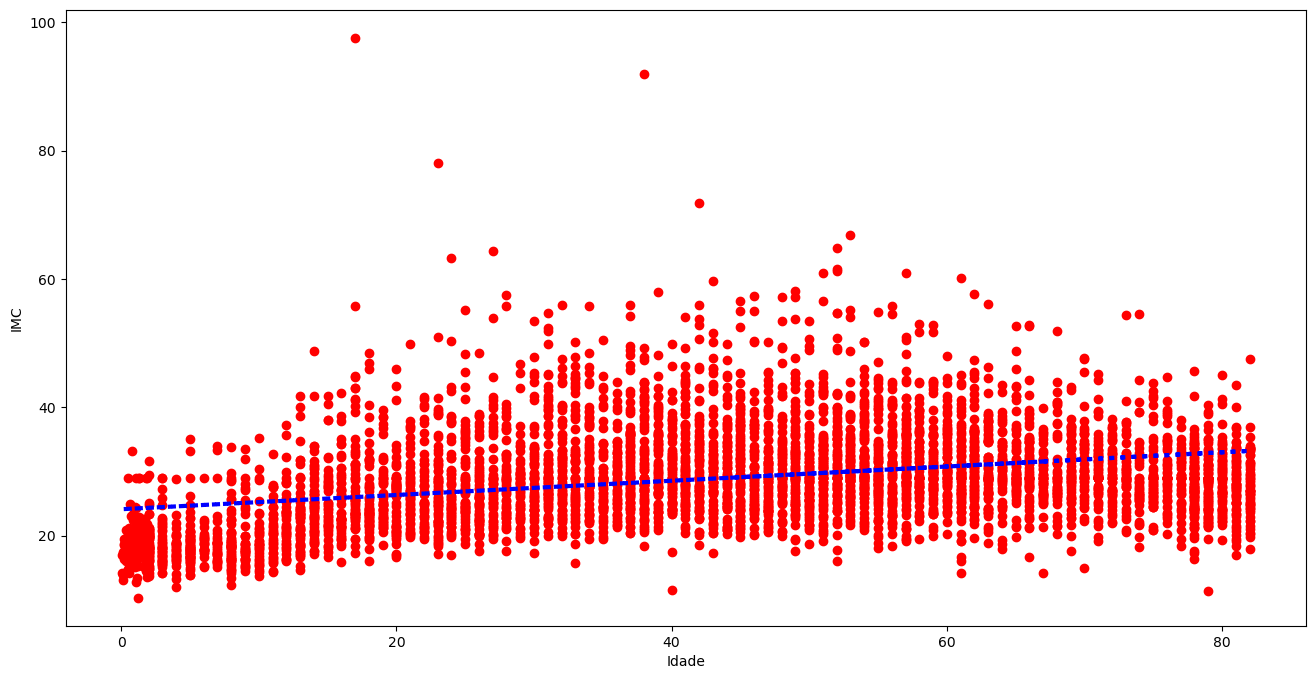

In [20]:
f_previsoes = reg.predict(X)

plt.figure(figsize = (16,8))
plt.scatter(df['age'], df['bmi'], c='red')
plt.plot(
    df['age'],
    f_previsoes,
    c='blue',
    linewidth=3,
    linestyle=':'
)

plt.xlabel('Idade')
plt.ylabel('IMC')

X = df[['age']]
y = df['bmi']

X2=sm.add_constant(X)
est=sm.OLS(y,X2)
est2=est.fit()
print(est2.summary())

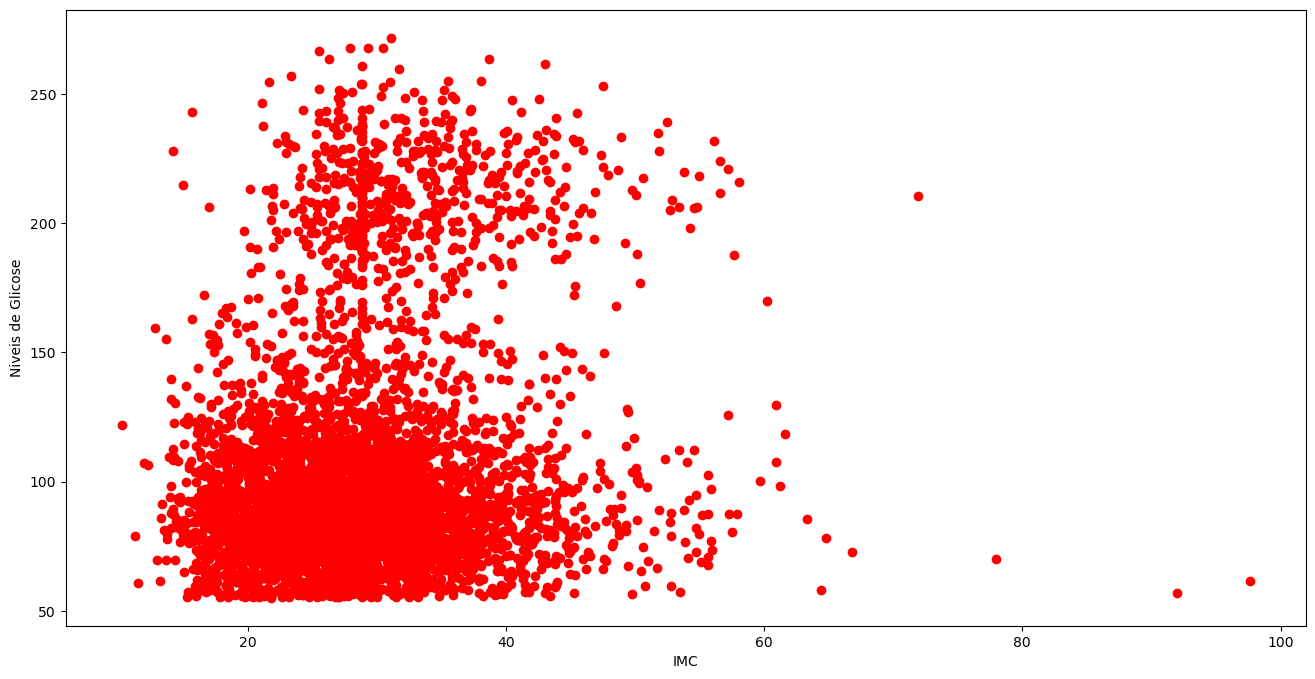

Coeficientes: [0.99267917]
Intercept: 77.4659626047237


In [21]:
plt.figure(figsize=(16, 8))
plt.scatter(df['bmi'], df['avg_glucose_level'], c='red')
plt.xlabel('IMC')
plt.ylabel('Niveis de Glicose')
plt.show()

X = df[['bmi']]
y = df['avg_glucose_level']

# Codificar a variável categórica "smoking_status"


reg = LinearRegression()
reg.fit(X, y)

# Coeficientes do modelo
print('Coeficientes:', reg.coef_)
print('Intercept:', reg.intercept_)

                            OLS Regression Results                            
Dep. Variable:      avg_glucose_level   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     149.7
Date:                Fri, 07 Jul 2023   Prob (F-statistic):           5.93e-34
Time:                        01:06:26   Log-Likelihood:                -26661.
No. Observations:                5110   AIC:                         5.333e+04
Df Residuals:                    5108   BIC:                         5.334e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         77.4660      2.426     31.935      0.0

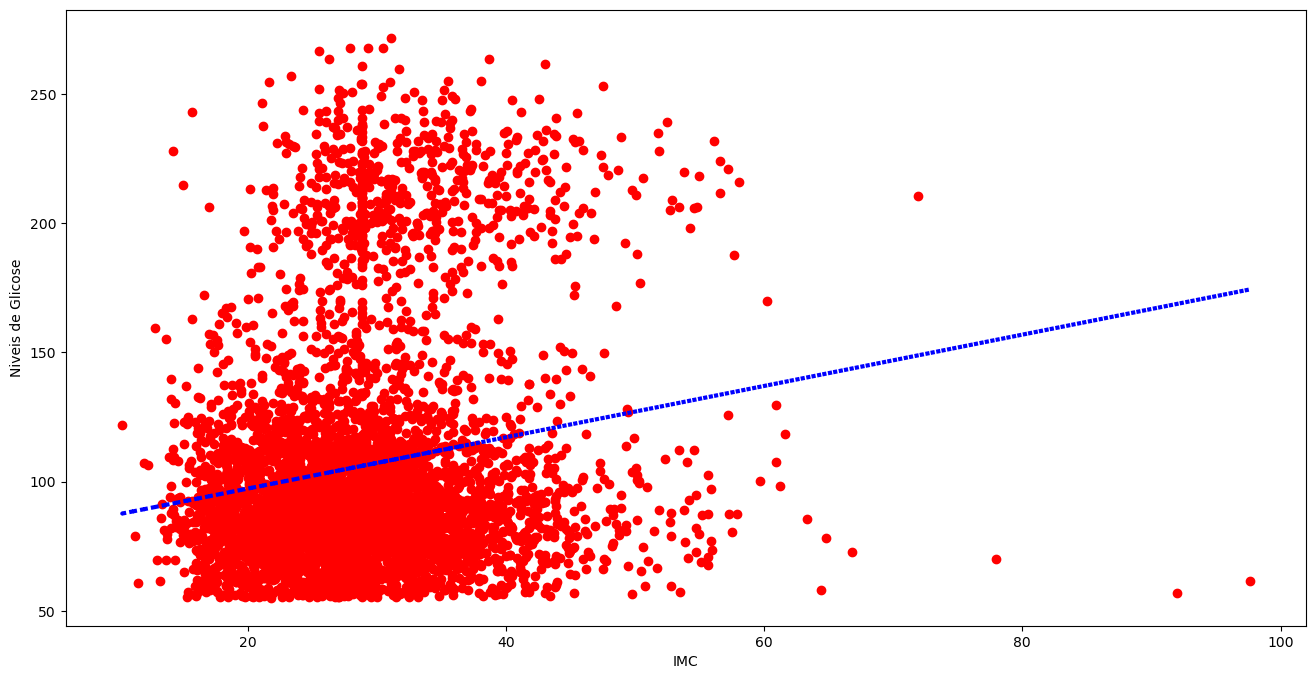

In [22]:
f_previsoes = reg.predict(X)

plt.figure(figsize = (16,8))
plt.scatter(df['bmi'], df['avg_glucose_level'], c='red')
plt.plot(
    df['bmi'],
    f_previsoes,
    c='blue',
    linewidth=3,
    linestyle=':'
)

plt.xlabel('IMC')
plt.ylabel('Niveis de Glicose')

X = df[['bmi']]
y = df['avg_glucose_level']

X2=sm.add_constant(X)
est=sm.OLS(y,X2)
est2=est.fit()
print(est2.summary())

# Clustering

In [23]:
df = df.dropna()

# Converter variáveis categóricas em numéricas (se necessário)
df = pd.get_dummies(df)

# Normalizar as variáveis contínuas (se necessário)
# Você pode usar a função MinMaxScaler ou StandardScaler do sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])

In [24]:
features = ['age', 'avg_glucose_level', 'bmi','stroke']

# Definir o número de clusters
num_clusters = 5

# Criar o objeto KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Ajustar o modelo aos dados
kmeans.fit(df[features])

KMeans(n_clusters=5, random_state=42)

Centróides dos Clusters:
[[ 4.95091932e-01  1.63935026e-01  2.41187187e-01 -1.31838984e-16]
 [ 1.66537630e-01  1.79206642e-01  1.48272353e-01  1.24900090e-16]
 [ 8.25783603e-01  3.57421932e-01  2.28153368e-01  1.00000000e+00]
 [ 7.31466616e-01  7.02604572e-01  2.60885751e-01  1.11022302e-16]
 [ 8.09031046e-01  1.54616842e-01  2.20529644e-01  2.08166817e-16]]


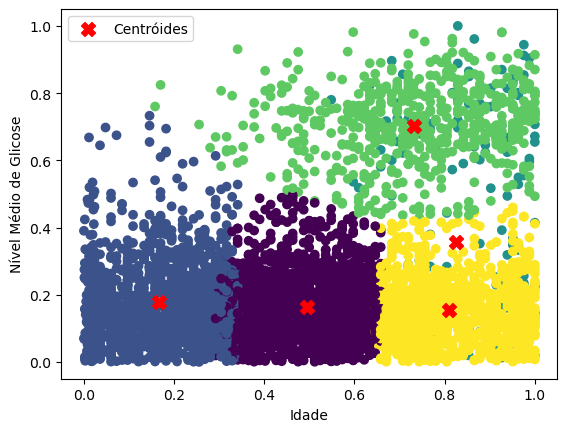

In [25]:
# Centróides dos clusters
centroids = kmeans.cluster_centers_
print('Centróides dos Clusters:')
print(centroids)

# Atribuir rótulos de cluster para cada ponto de dados
df['cluster_label'] = kmeans.labels_

# Visualizar os clusters (usando duas variáveis como exemplo)
plt.scatter(df['age'], df['avg_glucose_level'], c=df['cluster_label'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=100, c='red', label='Centróides')
plt.xlabel('Idade')
plt.ylabel('Nível Médio de Glicose')
plt.legend()
plt.show()

Conforme este gráfico podemos verificar os clusters entre idade e niveis médios de glicose.


# Arvore de Decisão

Aqui irei criar as arvores de decisão para o nosso modelo.

In [26]:
feature_cols=['age','smoking_status','bmi','avg_glucose_level','hypertension', 'heart_disease','gender', 'work_type','ever_married', 'Residence_type']
X = df[feature_cols] # Features
y = df.stroke # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9067188519243313


In [27]:
!pip install pydot


In [28]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydot

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols, class_names=['0', '1'])
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]  # Selecionar o primeiro elemento da lista
graph.write_png('stroke.png')
Image(graph.create_png())




Como esta árvore é muito grande e complexo, irei criar uma árvore mais pequena.

In [29]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9458577951728636


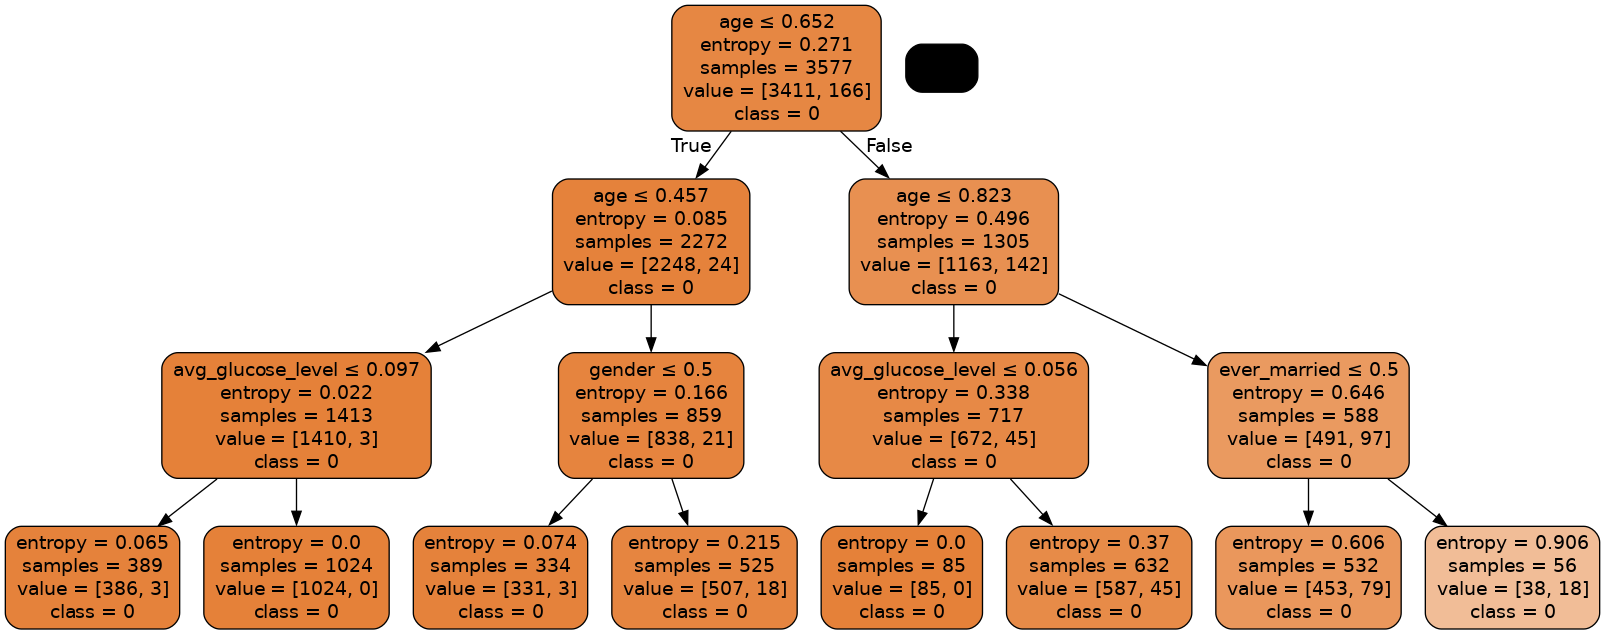

In [30]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols, class_names=['0', '1'])
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
graph.write_png('diabetes.png')
Image(graph.create_png())


# Redes Neuronais Artificias

Neste capítulo criei então três modelos RNA

In [31]:
dataset = df.values

In [32]:
dataset

array([[0.        , 0.81689453, 0.        , ..., 1.        , 1.        ,
        2.        ],
       [1.        , 0.74365234, 0.        , ..., 2.        , 1.        ,
        2.        ],
       [0.        , 0.97558594, 0.        , ..., 2.        , 1.        ,
        2.        ],
       ...,
       [1.        , 0.42626953, 0.        , ..., 2.        , 0.        ,
        0.        ],
       [0.        , 0.62158203, 0.        , ..., 1.        , 0.        ,
        3.        ],
       [1.        , 0.53613281, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [33]:
X = dataset[:,0:10]
Y = dataset[:,10]

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

X_scale

array([[0.        , 0.81689453, 0.        , ..., 0.80126489, 0.30126002,
        0.33333333],
       [0.5       , 0.74365234, 0.        , ..., 0.67902317, 0.21298095,
        0.66666667],
       [0.        , 0.97558594, 0.        , ..., 0.23451205, 0.25429553,
        0.66666667],
       ...,
       [0.5       , 0.42626953, 0.        , ..., 0.12865848, 0.2325315 ,
        0.66666667],
       [0.        , 0.62158203, 0.        , ..., 0.51320284, 0.17525773,
        0.33333333],
       [0.5       , 0.53613281, 0.        , ..., 0.13922999, 0.18213058,
        0.        ]])

In [34]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(3577, 10) (766, 10) (767, 10) (3577,) (766,) (767,)


In [35]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [36]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [37]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
112/112 [==============================] - 2s 4ms/step - loss: 0.3430 - accuracy: 0.9472 - val_loss: 0.2258 - val_accuracy: 0.9595
Epoch 2/100
112/112 [==============================] - 0s 2ms/step - loss: 0.2382 - accuracy: 0.9480 - val_loss: 0.2012 - val_accuracy: 0.9595
Epoch 3/100
112/112 [==============================] - 0s 2ms/step - loss: 0.2280 - accuracy: 0.9480 - val_loss: 0.1938 - val_accuracy: 0.9595
Epoch 4/100
112/112 [==============================] - 0s 2ms/step - loss: 0.2233 - accuracy: 0.9480 - val_loss: 0.1892 - val_accuracy: 0.9595
Epoch 5/100
112/112 [==============================] - 0s 2ms/step - loss: 0.2195 - accuracy: 0.9480 - val_loss: 0.1856 - val_accuracy: 0.9595
Epoch 6/100
112/112 [==============================] - 0s 2ms/step - loss: 0.2165 - accuracy: 0.9480 - val_loss: 0.1831 - val_accuracy: 0.9595
Epoch 7/100
112/112 [==============================] - 0s 2ms/step - loss: 0.2137 - accuracy: 0.9480 - val_loss: 0.1809 - val_accuracy: 0.9595

In [38]:
model.evaluate(X_test, Y_test)[1]

24/24 [==============================] - 0s 2ms/step - loss: 0.1472 - accuracy: 0.9583


0.958279013633728

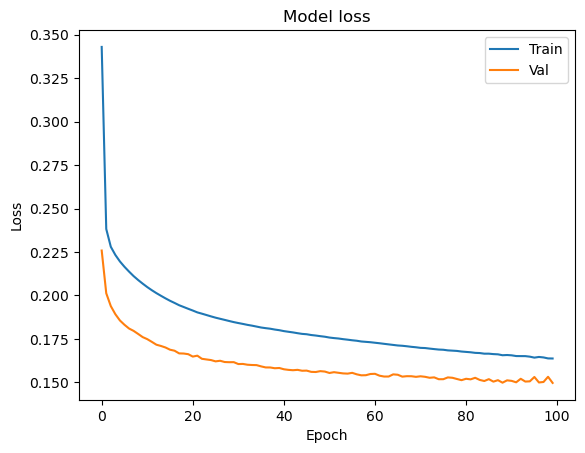

In [39]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

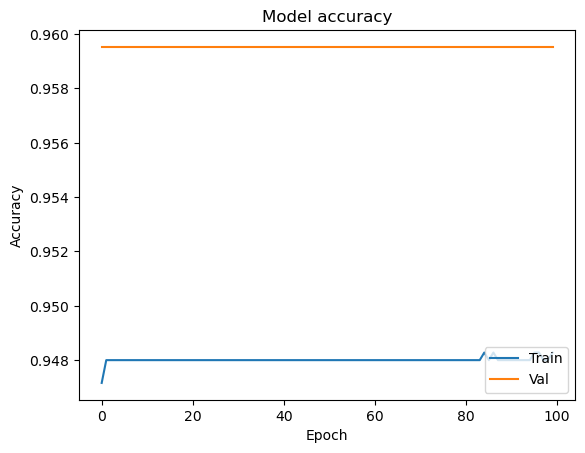

In [40]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


In [41]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
112/112 [==============================] - 5s 31ms/step - loss: 0.2101 - accuracy: 0.9463 - val_loss: 0.1575 - val_accuracy: 0.9595
Epoch 2/100
112/112 [==============================] - 3s 30ms/step - loss: 0.1812 - accuracy: 0.9480 - val_loss: 0.1648 - val_accuracy: 0.9595
Epoch 3/100
112/112 [==============================] - 3s 28ms/step - loss: 0.1744 - accuracy: 0.9480 - val_loss: 0.2111 - val_accuracy: 0.9595
Epoch 4/100
112/112 [==============================] - 3s 26ms/step - loss: 0.1698 - accuracy: 0.9480 - val_loss: 0.1831 - val_accuracy: 0.9595
Epoch 5/100
112/112 [==============================] - 3s 30ms/step - loss: 0.1718 - accuracy: 0.9480 - val_loss: 0.1617 - val_accuracy: 0.9595
Epoch 6/100
112/112 [==============================] - 3s 26ms/step - loss: 0.1644 - accuracy: 0.9480 - val_loss: 0.1908 - val_accuracy: 0.9595
Epoch 7/100
112/112 [==============================] - 3s 26ms/step - loss: 0.1668 - accuracy: 0.9477 - val_loss: 0.1583 - val_accuracy:

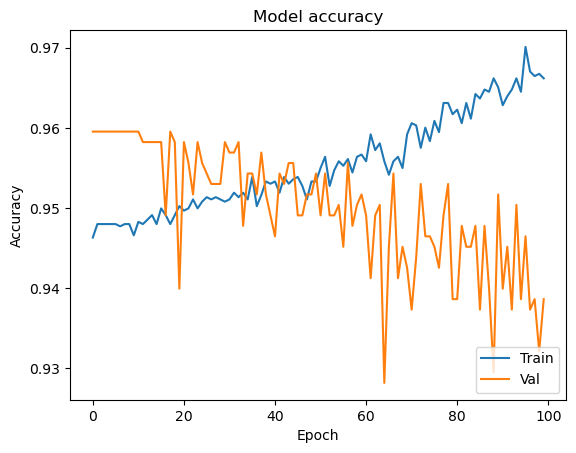

In [42]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

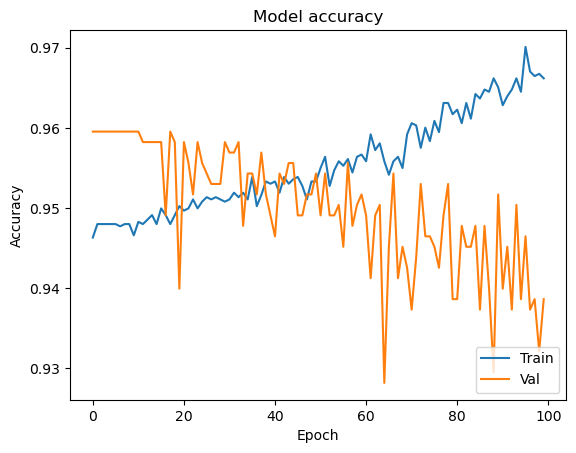

In [43]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [44]:
from keras import regularizers
from keras.layers import Dropout

model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
112/112 [==============================] - 5s 33ms/step - loss: 4.5830 - accuracy: 0.9407 - val_loss: 0.2576 - val_accuracy: 0.9595
Epoch 2/100
112/112 [==============================] - 3s 31ms/step - loss: 0.2545 - accuracy: 0.9480 - val_loss: 0.2095 - val_accuracy: 0.9595
Epoch 3/100
112/112 [==============================] - 3s 31ms/step - loss: 0.2398 - accuracy: 0.9480 - val_loss: 0.2015 - val_accuracy: 0.9595
Epoch 4/100
112/112 [==============================] - 3s 31ms/step - loss: 0.2322 - accuracy: 0.9480 - val_loss: 0.1924 - val_accuracy: 0.9595
Epoch 5/100
112/112 [==============================] - 4s 31ms/step - loss: 0.2235 - accuracy: 0.9480 - val_loss: 0.1851 - val_accuracy: 0.9595
Epoch 6/100
112/112 [==============================] - 4s 31ms/step - loss: 0.2192 - accuracy: 0.9480 - val_loss: 0.1862 - val_accuracy: 0.9595
Epoch 7/100
112/112 [==============================] - 4s 33ms/step - loss: 0.2166 - accuracy: 0.9480 - val_loss: 0.1850 - val_accuracy:

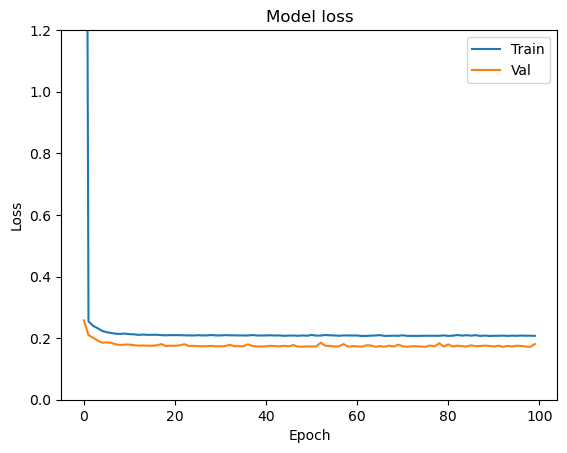

In [45]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

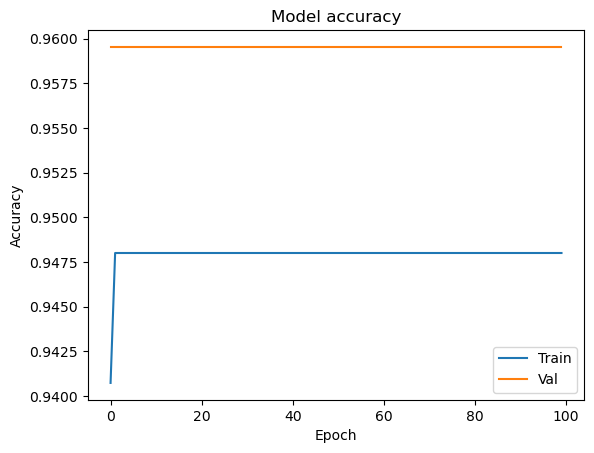

In [46]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()